# Overview

The file *src/models/compare_methods.py* runs through a number of k-fold cross validations for different classification methods. Below are the f1, precistion, and recall statistics for those model runs. The *train_sample.csv* was used for the k-fold cross validation.

This file compares the result of undersampling the class 0 for the unbalanced data set.

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
scores = pd.read_csv("../models/sample_scores.csv")
scores.groupby("model").agg(['mean', 'std'])

precision              recall                  f1  \
                         mean       std      mean       std      mean   
model                                                                   
Decision Tree        0.851178  0.068389  0.866633  0.044711  0.856759   
Logistic Regression  0.720612  0.048504  0.807145  0.046523  0.759659   
Random Forest        0.917586  0.042453  0.867984  0.041741  0.891177   

                               
                          std  
model                          
Decision Tree        0.039465  
Logistic Regression  0.030847  
Random Forest        0.030613

The Logistic Regression threw a *UndefinedMetricWarning* at each iteration. This is on my TODO list for digging into. For now, I will drop that classification method and focus on the Decision Tree & Random Forest.

In [3]:
scores = scores[scores['model'] != 'Logistic Regression'].reset_index(drop=True)

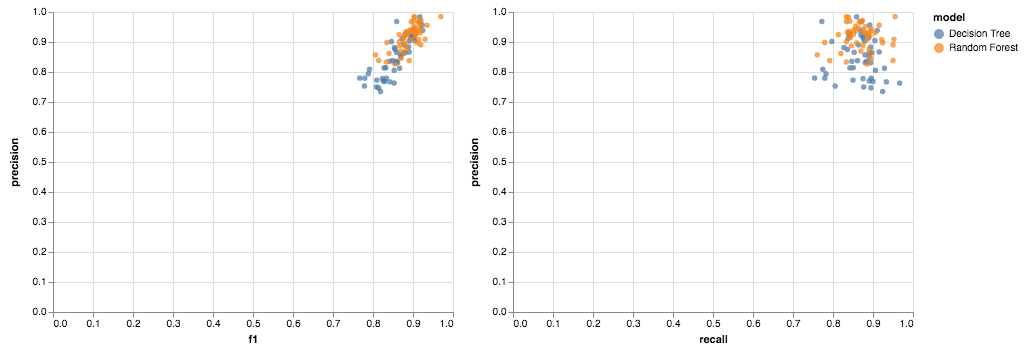

In [4]:
base = alt.Chart(scores).mark_circle().encode(
    alt.Y('precision:Q'),
    alt.Color('model:N')
)


left = base.encode(alt.X('f1:Q'))
right = base.encode(alt.X('recall:Q'))

left | right